<a href="https://colab.research.google.com/github/ArpanSM/Machine_Learning_Hackathons/blob/master/MachineHack_The_Great_Indian_Hiring_Hackathon_Rank_83.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://machinehack-be.s3.amazonaws.com/retail_price_prediction_mega_hiring_hackathon/Participants_Data_TGIH.zip
!unzip Participants_Data_TGIH.zip
!pip install bayesian-optimization
!pip install catboost
!pip install hyperopt
!pip install pycaret
!pip install optuna
!pip install scikit-optimize
!pip install tune_sklearn

In [ ]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
import warnings                                 
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/Participants_Data_TGIH/Train.csv')
dft = pd.read_csv('/content/Participants_Data_TGIH/Test.csv')
sub = pd.read_csv('/content/Participants_Data_TGIH/Sample Submission.csv')
seed = 41
random_state = seed

In [ ]:
from math import sqrt
from sklearn import preprocessing
from bayes_opt import BayesianOptimization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV, StratifiedKFold, KFold, cross_val_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler

In [ ]:
df = pd.read_csv('/content/Participants_Data_TGIH/Train.csv')
dft =pd.read_csv('/content/Participants_Data_TGIH/Test.csv')

def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
    
def feature(df,dft):

  

  df['InvoiceDate'] =  pd.to_datetime(df['InvoiceDate'])
  df['Year'] =df.InvoiceDate.dt.year
  df['Month'] =df.InvoiceDate.dt.month
  df['Day'] =df.InvoiceDate.dt.day
  df['Weekday'] =df.InvoiceDate.dt.weekday
  df['Age'] = df['InvoiceDate'].apply(lambda x: from_dob_to_age(x))
  
  dft['InvoiceDate'] =  pd.to_datetime(dft['InvoiceDate'])
  dft['Year'] =dft.InvoiceDate.dt.year
  dft['Month'] =dft.InvoiceDate.dt.month
  dft['Day'] =dft.InvoiceDate.dt.day
  dft['Weekday'] =dft.InvoiceDate.dt.weekday
  dft['Age'] = dft['InvoiceDate'].apply(lambda x: from_dob_to_age(x))
  
  df['Quantity'] = df['Quantity'].abs()
  dft['Quantity'] = dft['Quantity'].abs()
  
  df.drop(df[df.UnitPrice>2000].index, inplace=True)
  df.drop(df[df.Quantity>10000].index, inplace=True)

  del df['InvoiceNo']
  del dft['InvoiceNo']

  del df['InvoiceDate']
  del dft['InvoiceDate']

  print('Shape before deleting duplicate values:', df.shape)
  df=df.drop_duplicates()
  print('Shape After deleting duplicate values:', df.shape)

  # We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
  #df["UnitPrice"] = np.log1p(df["UnitPrice"])

  #We are using groupby in conjunction with transform to create the features.
  df["CustomerID_Mean"] = df.groupby('CustomerID')["UnitPrice"].transform('mean')
  CustomerID_Mean_mean_dict = df.groupby(['CustomerID'])['UnitPrice'].mean().to_dict()
  dft['CustomerID_Mean'] = dft['CustomerID'].apply(lambda x:CustomerID_Mean_mean_dict.get(x,0))
  df["CustomerID_min"] = df.groupby('CustomerID')["UnitPrice"].transform('min')
  CustomerID_min_min_dict = df.groupby(['CustomerID'])['UnitPrice'].min().to_dict()
  dft['CustomerID_min'] = dft['CustomerID'].apply(lambda x:CustomerID_min_min_dict.get(x,0))
  df["CustomerID_max"] = df.groupby('CustomerID')["UnitPrice"].transform('max')
  CustomerID_max_max_dict = df.groupby(['CustomerID'])['UnitPrice'].max().to_dict()
  dft['CustomerID_max'] = dft['CustomerID'].apply(lambda x:CustomerID_max_max_dict.get(x,0))
  df["CustomerID_count"] = df.groupby('CustomerID')["UnitPrice"].transform('count')
  CustomerID_count_count_dict = df.groupby(['CustomerID'])['UnitPrice'].count().to_dict()
  dft['CustomerID_count'] = dft['CustomerID'].apply(lambda x:CustomerID_count_count_dict.get(x,0))

  df["StockCode_Mean"] = df.groupby('StockCode')["UnitPrice"].transform('mean')
  StockCode_Mean_mean_dict = df.groupby(['StockCode'])['UnitPrice'].mean().to_dict()
  dft['StockCode_Mean'] = dft['StockCode'].apply(lambda x:StockCode_Mean_mean_dict.get(x,0))
  df["StockCode_min"] = df.groupby('StockCode')["UnitPrice"].transform('min')
  StockCode_min_min_dict = df.groupby(['StockCode'])['UnitPrice'].min().to_dict()
  dft['StockCode_min'] = dft['StockCode'].apply(lambda x:StockCode_min_min_dict.get(x,0))
  df["StockCode_max"] = df.groupby('StockCode')["UnitPrice"].transform('max')
  StockCode_max_max_dict = df.groupby(['StockCode'])['UnitPrice'].max().to_dict()
  dft['StockCode_max'] = dft['StockCode'].apply(lambda x:StockCode_max_max_dict.get(x,0))
  df["StockCode_count"] = df.groupby('StockCode')["UnitPrice"].transform('count')
  StockCode_count_count_dict = df.groupby(['StockCode'])['UnitPrice'].count().to_dict()
  dft['StockCode_count'] = dft['StockCode'].apply(lambda x:StockCode_count_count_dict.get(x,0))

  df["Description_Mean"] = df.groupby('Description')["UnitPrice"].transform('mean')
  Description_Mean_mean_dict = df.groupby(['Description'])['UnitPrice'].mean().to_dict()
  dft['Description_Mean'] = dft['Description'].apply(lambda x:Description_Mean_mean_dict.get(x,0))
  df["Description_min"] = df.groupby('Description')["UnitPrice"].transform('min')
  Description_min_min_dict = df.groupby(['Description'])['UnitPrice'].min().to_dict()
  dft['Description_min'] = dft['Description'].apply(lambda x:Description_min_min_dict.get(x,0))
  df["Description_max"] = df.groupby('Description')["UnitPrice"].transform('max')
  Description_max_max_dict = df.groupby(['Description'])['UnitPrice'].max().to_dict()
  dft['Description_max'] = dft['Description'].apply(lambda x:Description_max_max_dict.get(x,0))
  df["Description_count"] = df.groupby('Description')["UnitPrice"].transform('count')
  Description_count_count_dict = df.groupby(['Description'])['UnitPrice'].count().to_dict()
  dft['Description_count'] = dft['Description'].apply(lambda x:Description_count_count_dict.get(x,0))

  df["Country_Mean"] = df.groupby('Country')["UnitPrice"].transform('mean')
  Country_Mean_mean_dict = df.groupby(['Country'])['UnitPrice'].mean().to_dict()
  dft['Country_Mean'] = dft['Country'].apply(lambda x:Country_Mean_mean_dict.get(x,0))
  df["Country_min"] = df.groupby('Country')["UnitPrice"].transform('min')
  Country_min_min_dict = df.groupby(['Country'])['UnitPrice'].min().to_dict()
  dft['Country_min'] = dft['Country'].apply(lambda x:Country_min_min_dict.get(x,0))
  df["Country_max"] = df.groupby('Country')["UnitPrice"].transform('max')
  Country_max_max_dict = df.groupby(['Country'])['UnitPrice'].max().to_dict()
  dft['Country_max'] = dft['Country'].apply(lambda x:Country_max_max_dict.get(x,0))
  df["Country_count"] = df.groupby('Country')["UnitPrice"].transform('count')
  Country_count_count_dict = df.groupby(['Country'])['UnitPrice'].count().to_dict()
  dft['Country_count'] = dft['Country'].apply(lambda x:Country_count_count_dict.get(x,0))

  df["Month_Mean"] = df.groupby('Month')["UnitPrice"].transform('mean')
  Month_Mean_mean_dict = df.groupby(['Month'])['UnitPrice'].mean().to_dict()
  dft['Month_Mean'] = dft['Month'].apply(lambda x:Month_Mean_mean_dict.get(x,0))
  df["Month_min"] = df.groupby('Month')["UnitPrice"].transform('min')
  Month_min_min_dict = df.groupby(['Month'])['UnitPrice'].min().to_dict()
  dft['Month_min'] = dft['Month'].apply(lambda x:Month_min_min_dict.get(x,0))
  df["Month_max"] = df.groupby('Month')["UnitPrice"].transform('max')
  Month_max_max_dict = df.groupby(['Month'])['UnitPrice'].max().to_dict()
  dft['Month_max'] = dft['Month'].apply(lambda x:Month_max_max_dict.get(x,0))
  df["Month_count"] = df.groupby('Month')["UnitPrice"].transform('count')
  Month_count_count_dict = df.groupby(['Month'])['UnitPrice'].count().to_dict()
  dft['Month_count'] = dft['Month'].apply(lambda x:Month_count_count_dict.get(x,0))

  df["Day_Mean"] = df.groupby('Day')["UnitPrice"].transform('mean')
  Day_Mean_mean_dict = df.groupby(['Day'])['UnitPrice'].mean().to_dict()
  dft['Day_Mean'] = dft['Day'].apply(lambda x:Day_Mean_mean_dict.get(x,0))
  df["Day_min"] = df.groupby('Day')["UnitPrice"].transform('min')
  Day_min_min_dict = df.groupby(['Day'])['UnitPrice'].min().to_dict()
  dft['Day_min'] = dft['Day'].apply(lambda x:Day_min_min_dict.get(x,0))
  df["Day_max"] = df.groupby('Day')["UnitPrice"].transform('max')
  Day_max_max_dict = df.groupby(['Day'])['UnitPrice'].max().to_dict()
  dft['Day_max'] = dft['Day'].apply(lambda x:Day_max_max_dict.get(x,0))
  df["Day_count"] = df.groupby('Day')["UnitPrice"].transform('count')
  Day_count_count_dict = df.groupby(['Day'])['UnitPrice'].count().to_dict()
  dft['Day_count'] = dft['Day'].apply(lambda x:Day_count_count_dict.get(x,0))

  df["Weekday_Mean"] = df.groupby('Weekday')["UnitPrice"].transform('mean')
  Weekday_Mean_mean_dict = df.groupby(['Weekday'])['UnitPrice'].mean().to_dict()
  dft['Weekday_Mean'] = dft['Weekday'].apply(lambda x:Weekday_Mean_mean_dict.get(x,0))
  df["Weekday_min"] = df.groupby('Weekday')["UnitPrice"].transform('min')
  Weekday_min_min_dict = df.groupby(['Weekday'])['UnitPrice'].min().to_dict()
  dft['Weekday_min'] = dft['Weekday'].apply(lambda x:Weekday_min_min_dict.get(x,0))
  df["Weekday_max"] = df.groupby('Weekday')["UnitPrice"].transform('max')
  Weekday_max_max_dict = df.groupby(['Weekday'])['UnitPrice'].max().to_dict()
  dft['Weekday_max'] = dft['Weekday'].apply(lambda x:Weekday_max_max_dict.get(x,0))
  df["Weekday_count"] = df.groupby('Weekday')["UnitPrice"].transform('count')
  Weekday_count_count_dict = df.groupby(['Weekday'])['UnitPrice'].count().to_dict()
  dft['Weekday_count'] = dft['Weekday'].apply(lambda x:Weekday_count_count_dict.get(x,0))

  df["Age_Mean"] = df.groupby('Age')["UnitPrice"].transform('mean')
  Age_Mean_mean_dict = df.groupby(['Age'])['UnitPrice'].mean().to_dict()
  dft['Age_Mean'] = dft['Age'].apply(lambda x:Age_Mean_mean_dict.get(x,0))
  df["Age_min"] = df.groupby('Age')["UnitPrice"].transform('min')
  Age_min_min_dict = df.groupby(['Age'])['UnitPrice'].min().to_dict()
  dft['Age_min'] = dft['Age'].apply(lambda x:Age_min_min_dict.get(x,0))
  df["Age_max"] = df.groupby('Age')["UnitPrice"].transform('max')
  Age_max_max_dict = df.groupby(['Age'])['UnitPrice'].max().to_dict()
  dft['Age_max'] = dft['Age'].apply(lambda x:Age_max_max_dict.get(x,0))
  df["Age_count"] = df.groupby('Age')["UnitPrice"].transform('count')
  Age_count_count_dict = df.groupby(['Age'])['UnitPrice'].count().to_dict()
  dft['Age_count'] = dft['Age'].apply(lambda x:Age_count_count_dict.get(x,0))
  df["Age_std"] = df.groupby('Age')["UnitPrice"].transform('std')
  Age_std_dict = df.groupby(['Age'])['UnitPrice'].std().to_dict()
  dft['Age_std'] = dft['Age'].apply(lambda x:Age_std_dict.get(x,0))
  df["Age_skew"] = df.groupby('Age')["UnitPrice"].transform('skew')
  Age_skew_dict = df.groupby(['Age'])['UnitPrice'].skew().to_dict()
  dft['Age_skew'] = dft['Age'].apply(lambda x:Age_skew_dict.get(x,0))
  return df,dft

df, dft = feature(df,dft)

X = df.drop(["UnitPrice"], axis=1)
y = df["UnitPrice"]

r = RobustScaler(quantile_range = (0.1,0.9))
X_trans = pd.DataFrame(r.fit_transform(X))
dft_trans = pd.DataFrame(r.fit_transform(dft))

Shape before deleting duplicate values: (284763, 11)
Shape After deleting duplicate values: (280963, 11)


In [ ]:
df.head()

,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Year,Month,Day,Weekday,Age,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_Mean,StockCode_min,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Month_count,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Weekday_count,Age_Mean,Age_min,Age_max,Age_count,Age_std,Age_skew
0,1583,144,3,3.75,14056.0,35,2011,5,6,4,9,2.782912,0.290,12.75,783,3.745706,3.39,4.18,326,3.745706,3.39,4.18,326,3.026613,0.0,1867.86,249645,3.351245,0.0,1241.98,20061,2.980692,0.00,1126.00,13022,3.176404,0.0,1867.86,38729,3.162564,0.0,1867.86,250811,12.575651,81.457760
1,1300,3682,6,1.95,13098.0,35,2011,5,11,2,9,2.918627,0.100,14.95,386,1.973125,1.65,4.13,192,1.973125,1.65,4.13,192,3.026613,0.0,1867.86,249645,3.351245,0.0,1241.98,20061,3.096440,0.00,1687.17,9533,3.076788,0.0,1270.06,48857,3.162564,0.0,1867.86,250811,12.575651,81.457760
2,2178,1939,4,5.95,15044.0,35,2011,11,20,6,8,4.917383,0.190,19.95,298,5.894984,4.95,5.95,309,5.894984,4.95,5.95,309,3.026613,0.0,1867.86,249645,3.016296,0.0,1526.76,45097,2.933435,0.00,451.42,10289,2.805540,0.0,434.51,43372,2.995904,0.0,1599.26,30152,18.021898,71.132592
3,2115,2983,1,0.83,15525.0,35,2011,11,22,1,8,2.708174,0.120,14.95,115,0.824939,0.72,0.83,326,0.824939,0.72,0.83,326,3.026613,0.0,1867.86,249645,3.016296,0.0,1526.76,45097,2.906114,0.04,700.00,8633,3.000414,0.0,1136.30,47085,2.995904,0.0,1599.26,30152,18.021898,71.132592
4,1210,2886,12,1.65,13952.0,35,2011,5,6,4,9,3.778221,0.001,16.95,95,1.635841,1.45,1.65,113,1.635841,1.45,1.65,113,3.026613,0.0,1867.86,249645,3.351245,0.0,1241.98,20061,2.980692,0.00,1126.00,13022,3.176404,0.0,1867.86,38729,3.162564,0.0,1867.86,250811,12.575651,81.457760


In [ ]:
dft.head()

,StockCode,Description,Quantity,CustomerID,Country,Year,Month,Day,Weekday,Age,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_Mean,StockCode_min,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Month_count,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Weekday_count,Age_Mean,Age_min,Age_max,Age_count,Age_std,Age_skew
0,1709,1079,3,16161.0,35,2011,2,22,1,9,1.282211,0.329304,2.887590,351,0.974560,0.974560,0.974560,24,0.974560,0.974560,0.974560,24,1.152783,0.0,7.533084,253244,1.211710,0.058269,5.773588,14105,1.132021,0.039221,6.552508,8712,1.152751,0.0,7.036412,47613,1.166808,0.0,7.533084,254019,0.610211,0.997878
1,510,3457,1,17341.0,35,2010,12,8,2,9,1.031713,0.254642,2.393339,138,0.778757,0.604316,1.241269,38,0.778757,0.604316,1.241269,38,1.152783,0.0,7.533084,253244,1.168076,0.000000,7.377921,31266,1.153095,0.058269,7.533084,11503,1.160968,0.0,7.147606,49525,1.166808,0.0,7.533084,254019,0.610211,0.997878
2,604,694,36,15158.0,35,2011,10,25,1,9,0.963032,0.598837,1.479329,3,1.577717,1.373716,2.135349,200,1.577717,1.373716,2.135349,200,1.152783,0.0,7.533084,253244,1.157038,0.000000,6.811244,35390,1.129391,0.000000,5.690359,8570,1.152751,0.0,7.036412,47613,1.166808,0.0,7.533084,254019,0.610211,0.997878
3,1478,3473,2,16033.0,35,2011,6,27,0,9,1.314701,0.190620,3.256172,810,0.967475,0.810930,1.456287,369,0.967475,0.810930,1.456287,369,1.152783,0.0,7.533084,253244,1.183013,0.039221,6.552508,19577,1.145894,0.000000,7.448246,8859,1.179885,0.0,7.377921,46398,1.166808,0.0,7.533084,254019,0.610211,0.997878
4,3216,871,1,15351.0,35,2011,11,6,6,9,1.237081,0.350657,2.769459,167,2.606908,1.029619,3.256557,335,2.606908,1.029619,3.256557,335,1.152783,0.0,7.533084,253244,1.130304,0.000000,7.331558,46012,1.148660,0.000000,7.027315,13217,1.135990,0.0,6.076518,44244,1.166808,0.0,7.533084,254019,0.610211,0.997878


In [ ]:
# Organize our data for training
#y_trans = pd.DataFrame(np.log1p(y))
#df_trans = pd.concat([X_trans,y], axis=1)
#df_trans.to_csv("df_trans.csv",index=False)
#dft_trans.to_csv("dft_trans.csv",index=False)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

In [ ]:
#xgb.plot_importance(xg_reg)
#plt.figure(figsize=(8,8))
#plt.show()

#### Basic Model Comparison and Stacking

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 7.573504


In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 7.612018


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
et_reg = ExtraTreesRegressor()
et_reg.fit(X_train,y_train)
preds = et_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 7.210672


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
et_reg = ExtraTreesRegressor(,)
et_reg.fit(X_train,y_train)
preds = et_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 6.985570


In [ ]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train,y_train)
preds = lgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.721297


In [ ]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train,y_train)
preds = lgb_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 6.108690


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
rfr_reg = RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
preds = rfr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 5.860199


In [ ]:
from sklearn.ensemble import RandomForestRegressor 
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
rfr_reg = RandomForestRegressor()
rfr_reg.fit(X_train,y_train)
preds = rfr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 5.582911


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train,y_train)
preds = gbr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 7.447625


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor 
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
gbr_reg = GradientBoostingRegressor()
gbr_reg.fit(X_train,y_train)
preds = gbr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 8.002337


In [ ]:
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
cbr_reg = CatBoostRegressor()
cbr_reg.fit(X_train,y_train,silent=True)
preds = cbr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 7.380475


In [ ]:
from catboost import CatBoostRegressor
X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans, test_size=0.3, random_state=seed)
cbr_reg = CatBoostRegressor()
cbr_reg.fit(X_train,y_train,silent=True)
preds = cbr_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(preds)))
print("RMSE: %f" % (rmse))

RMSE: 6.579945


In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone


X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,random_state=42, test_size=0.3)
   
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

stacked_averaged_models = StackingAveragedModels(base_models = (lgb_reg, rfr_reg, cbr_reg),
                                                 meta_model = lasso)

stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

X_train, X_test, y_train, y_test = train_test_split(X_trans, y_trans,random_state=42, test_size=0.3)
   
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

stacked_averaged_models = StackingAveragedModels(base_models = (lgb_reg, rfr_reg, cbr_reg),
                                                 meta_model = lasso)

stacked_averaged_models.fit(X_train, y_train)
y_pred = stacked_averaged_models.predict(X_test)
rmse = np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))
print("RMSE: %f" % (rmse))

In [ ]:
#Xgboost CV
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror"}

cv_results = xgb.cv(dtrain=data_dmatrix,
                    params=params,
                    nfold=3,
                    num_boost_round=50,
                    metrics="rmse",
                    as_pandas=True,
                    seed=seed)

cv_results.head()

####H2O.ai

In [ ]:
!pip install h2o
import h2o
h2o.init()

In [ ]:
df = h2o.import_file('/content/Participants_Data_TGIH/Train.csv')
dft = h2o.import_file('/content/Participants_Data_TGIH/Test.csv')
#df['MULTIPLE_OFFENSE'] = df['MULTIPLE_OFFENSE'].asfactor()
print(df.types)
print(dft.types)

In [ ]:
#df_train, df_val, df_test = df.split_frame(ratios=[.7,.2])
y = "UnitPrice"
x = df.columns
x.remove(y)
ignored_col_list = "InvoiceNo"
x.remove(ignored_col_list)

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(nfolds=5,
                max_runtime_secs=1*60,
                exclude_algos=['DeepLearning'],
                verbosity = "info",
                sort_metric='RMSE',
                stopping_metric='RMSE',
                exploitation_ratio = 0.1)
aml.train(x=x,y=y,training_frame=df)#,validation_frame=df_val)
aml.leaderboard

In [ ]:
dft['predict'] = aml.leader.predict(dft)
h2o.download_csv(dft, "dft_f.csv")
h2o_out = pd.read_csv('/content/dft_f.csv')
h2o_out.head()

In [ ]:
sub['UnitPrice'] = np.expm1(h2o_out['predict'])
sub.head(20)
#sub.to_csv("out_1hour.csv",index=False)

####PyCaret

In [ ]:
from pycaret.regression import *
exp_reg = setup(df,
                target='UnitPrice',
                use_gpu = True,
                #numeric_imputation = 'mean', #median
                #categorical_imputation = 'mode', #constant
                #numeric_features = [],
                #categorical_features = [],
                #date_features = [],
                #ignore_features = [],
                #ordinal_features = {'column_name' : [‘low’, ‘medium’, ‘high’] },
                #high_cardinality_features = [],
                #high_cardinality_method = 'frequency', #clustering,
                #group_features = [],
                #handle_unknown_categorical = True,
                #unknown_categorical_method = 'least_frequent', or 'most_frequent',
                combine_rare_levels = True,
                #bin_numeric_features = ['Quantity','Country'],
                transformation = True,
                transformation_method = 'yeo-johnson',#'quantile',yeo-johnson,
                #transform_target = True,
                #transform_target_method = 'yeo-johnson', #box-cox
                #feature_selection = True,
                normalize = True,
                normalize_method = 'maxabs',#minmax ,maxabs ,robust, zscore,
                #pca = True,
                #pca_method = 'incremental', #kernel, incremental, linear
                feature_interaction = False,
                feature_ratio = False,
                trigonometry_features=False,
                polynomial_features = False)
#One Hot Encoding - categorical features

,Description,Value
0,session_id,5267
1,Target,UnitPrice
2,Original Data,"(284763, 44)"
3,Missing Values,False
4,Numeric Features,33
5,Categorical Features,9
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(199334, 67)"


In [ ]:
xgboost = create_model('xgboost', tree_method = 'gpu_hist', gpu_id = 0, fold=15)
predict_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2286,34.7934,5.8986,0.5956,0.0957,1.1888
1,0.1823,13.0989,3.6192,0.8255,0.0830,0.0721
2,0.3344,210.8148,14.5195,-1.9559,0.1108,0.1430
3,0.1293,0.8049,0.8971,0.9769,0.0766,0.0689
4,0.3199,165.9699,12.8829,0.6855,0.0891,0.0705
5,0.2823,61.5174,7.8433,0.6297,0.0868,0.1249
6,0.3542,299.8518,17.3162,0.4292,0.0916,0.1096
7,0.2245,41.4615,6.4391,0.8857,0.1000,0.0777
8,0.2200,86.4061,9.2955,0.7562,0.0798,0.0693
9,0.2651,56.3816,7.5088,0.3652,0.0941,0.2626


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2056,34.326199,5.8589,0.7493,0.0829,0.0693


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2010,Month_5,Month_others_infrequent,Weekday_0,Weekday_4,Month_count_16225,Month_count_19337,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_47613,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_12,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_6,InvoiceDate_month_7,InvoiceDate_weekday_3,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,1.907716,0.012977,0.658861,0.111248,0.348544,-1.185822,-0.326742,0.214118,-0.332170,-0.019251,-0.990488,-1.177568,-1.439993,-1.476508,-0.998894,-1.159177,-0.222727,-0.175605,0.348048,0.352194,0.464824,2.744052,-1.084690,0.366351,-0.660762,1.270700,1.327382,-1.667664,0.0,-1.672130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.345520
1,0.433826,0.265041,-0.842155,0.775714,0.348544,1.236017,0.611494,0.214118,-0.440112,-0.044208,0.427956,-1.571590,1.395866,1.732226,0.447008,-1.584741,-0.222727,-0.175605,0.348048,0.352194,1.612182,-0.364327,-0.050839,0.660951,-0.660762,-0.113830,-1.909360,0.393215,0.0,0.854746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75,5.701655
2,-0.844284,-0.378325,0.658861,-0.039482,0.348544,0.167840,-0.276434,-0.388352,0.682001,0.106017,-1.058117,-1.322253,-1.348517,-1.504386,-1.068207,-1.306086,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.007787,-0.660762,-0.854000,-0.349273,0.393215,0.0,0.854746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.431195
3,0.322459,-1.163795,1.595677,0.137368,0.348544,0.823930,1.315753,0.214118,2.922444,0.635975,-0.680458,-0.764647,-0.953768,-0.833298,-0.681551,-0.740550,-0.222727,-0.175605,0.348048,0.352194,-0.811510,-0.364327,0.619221,-1.306837,1.489647,-0.090902,-0.513674,-0.556335,0.0,-0.686644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.809027
4,-0.393009,-1.783085,-0.648306,1.121607,0.348544,-1.185822,-0.486169,-0.258416,-0.452600,0.564830,-0.857672,-0.869360,-0.659727,-0.469260,-0.862862,-0.846614,-0.222727,-0.175605,0.348048,0.352194,-1.511866,-0.364327,-1.483536,0.366351,-0.660762,1.270700,1.327382,0.286618,0.0,1.405064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25,1.212548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.035462,1.209166,-1.048028,-0.637605,0.348544,-1.741633,-1.540043,-1.377366,-0.579968,0.161369,0.006197,1.310459,-0.171095,0.060452,0.018767,1.343346,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.085764,1.613511,-0.778846,0.148797,0.393215,0.0,0.854746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
lightgbm = create_model('lightgbm')
predict_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2820,32.7318,5.7212,0.5958,0.1276,0.7726
1,0.4056,153.6948,12.3974,-1.0784,0.1300,0.1921
2,0.2829,38.5616,6.2098,0.8712,0.1149,0.1178
3,0.3701,86.0843,9.2782,0.5384,0.1200,0.1493
4,0.4037,196.9261,14.0330,0.6425,0.1165,0.1730
5,0.2983,66.0737,8.1286,0.7619,0.1202,0.1200
6,0.3233,25.0638,5.0064,0.7913,0.1244,0.1436
7,0.3071,29.3778,5.4201,0.8750,0.1262,0.1395
8,0.3542,83.1011,9.1160,0.6850,0.1171,0.1088
9,0.3692,62.9062,7.9313,0.7688,0.1191,0.1137


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.2625,29.6148,5.4419,0.7837,0.1174,0.1201


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2010,Month_5,Month_others_infrequent,Weekday_0,Weekday_4,Month_count_16225,Month_count_19337,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_47613,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_12,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_6,InvoiceDate_month_7,InvoiceDate_weekday_3,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,1.907716,0.012977,0.658861,0.111248,0.348544,-1.185822,-0.326742,0.214118,-0.332170,-0.019251,-0.990488,-1.177568,-1.439993,-1.476508,-0.998894,-1.159177,-0.222727,-0.175605,0.348048,0.352194,0.464824,2.744052,-1.084690,0.366351,-0.660762,1.270700,1.327382,-1.667664,0.0,-1.672130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.454441
1,0.433826,0.265041,-0.842155,0.775714,0.348544,1.236017,0.611494,0.214118,-0.440112,-0.044208,0.427956,-1.571590,1.395866,1.732226,0.447008,-1.584741,-0.222727,-0.175605,0.348048,0.352194,1.612182,-0.364327,-0.050839,0.660951,-0.660762,-0.113830,-1.909360,0.393215,0.0,0.854746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75,5.827702
2,-0.844284,-0.378325,0.658861,-0.039482,0.348544,0.167840,-0.276434,-0.388352,0.682001,0.106017,-1.058117,-1.322253,-1.348517,-1.504386,-1.068207,-1.306086,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.007787,-0.660762,-0.854000,-0.349273,0.393215,0.0,0.854746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.458857
3,0.322459,-1.163795,1.595677,0.137368,0.348544,0.823930,1.315753,0.214118,2.922444,0.635975,-0.680458,-0.764647,-0.953768,-0.833298,-0.681551,-0.740550,-0.222727,-0.175605,0.348048,0.352194,-0.811510,-0.364327,0.619221,-1.306837,1.489647,-0.090902,-0.513674,-0.556335,0.0,-0.686644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.836042
4,-0.393009,-1.783085,-0.648306,1.121607,0.348544,-1.185822,-0.486169,-0.258416,-0.452600,0.564830,-0.857672,-0.869360,-0.659727,-0.469260,-0.862862,-0.846614,-0.222727,-0.175605,0.348048,0.352194,-1.511866,-0.364327,-1.483536,0.366351,-0.660762,1.270700,1.327382,0.286618,0.0,1.405064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25,1.274577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.035462,1.209166,-1.048028,-0.637605,0.348544,-1.741633,-1.540043,-1.377366,-0.579968,0.161369,0.006197,1.310459,-0.171095,0.060452,0.018767,1.343346,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.085764,1.613511,-0.778846,0.148797,0.393215,0.0,0.854746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
catboost = create_model('catboost')
predict_model(catboost)

In [ ]:
gbr = create_model('gbr')
predict_model(gbr)

In [ ]:
dt = create_model('dt')
predict_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1566,49.3171,7.0226,0.8318,0.0803,0.0225
1,0.3420,178.1725,13.3481,0.3754,0.1197,0.9139
2,0.1353,35.2200,5.9346,0.2974,0.0910,0.0278
3,0.1725,45.4318,6.7403,0.8699,0.0874,0.0372
4,0.1827,55.1546,7.4266,0.7773,0.0907,0.0284
5,0.0957,9.3860,3.0637,0.8764,0.0834,0.0204
6,0.2365,161.5525,12.7103,0.4215,0.0915,0.0289
7,0.1199,22.1391,4.7052,0.6017,0.0838,0.0222
8,0.1138,9.8675,3.1413,0.9115,0.0888,0.0227
9,0.1808,99.8342,9.9917,0.2170,0.0936,0.0335


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Decision Tree Regressor,0.1873,100.6059,10.0302,0.5976,0.093,0.0427


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2011,Month_4,Month_6,Month_others_infrequent,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_44244,Weekday_count_46398,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_5,InvoiceDate_month_7,InvoiceDate_month_8,InvoiceDate_weekday_1,InvoiceDate_weekday_3,InvoiceDate_weekday_4,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,-0.625309,0.833066,-1.050292,1.129125,0.348902,0.504201,0.000914,-0.888161,-0.440921,0.741045,0.273112,1.187521,1.170675,1.108064,0.292358,1.221553,-0.222548,-0.176468,0.348518,0.352698,1.036659,-0.366338,1.114911,-1.018374,1.485983,-1.484212,-1.008222,-0.234503,0.0,-0.400496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95,4.95
1,-1.195406,-1.220092,-0.843444,0.720828,0.348902,0.394349,0.333397,1.144029,-0.440921,-0.419008,0.842081,-1.125193,0.823239,1.224682,0.869147,-1.105894,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,1.671492,-0.661926,1.258641,-0.203762,0.286623,0.0,1.405827,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,3.75
2,-0.044327,1.347326,-1.050292,-0.446123,0.348902,-0.177247,-0.486109,-0.888161,-0.440921,0.924162,-0.225581,0.881722,-0.364404,-0.288027,-0.216179,0.917021,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,-1.456117,-0.661926,-1.375193,0.382002,-1.669632,0.0,-1.673699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.45,1.45
3,-1.820453,-0.074448,-1.050292,0.400877,0.348902,-1.184037,0.120592,0.209968,-0.440921,-0.686354,0.013102,1.457504,-0.351005,-0.109079,0.027543,1.489109,-0.222548,-0.176468,0.348518,0.352698,-0.379546,-0.366338,0.804751,0.363523,-0.661926,1.266824,1.328660,-1.669632,0.0,-1.673699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.65
4,-0.613577,1.554507,-0.648758,-0.681789,0.348902,-0.059773,0.213359,0.832376,-0.440921,-0.854648,1.390040,-0.435629,2.002521,2.047748,1.420694,-0.407137,-0.222548,-0.176468,0.348518,0.352698,1.495011,-0.366338,1.543335,1.417519,1.485983,1.144765,0.389540,0.393233,0.0,0.855321,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.95,9.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.718521,0.751714,0.661488,-1.297820,0.348902,0.504201,-0.627663,-1.916887,-0.440921,1.570760,-1.003351,-0.049520,-1.376813,-1.267253,-1.014174,-0.017368,-0.222548,-0.176468,0.348518,0.352698,0.037654,-0.366338,0.787226,-1.018374,1.485983,-1.484212,-1.008222,-0.556912,0.0,-0.687024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
ada = create_model('ada')
predict_model(ada)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.3079,170.0073,13.0387,0.4202,0.3916,1.1892
1,1.5300,68.6234,8.2839,0.7594,0.4380,1.5526
2,1.5398,69.9449,8.3633,-0.3952,0.4413,1.1905
3,1.4912,69.2169,8.3197,0.8018,0.4341,1.1070
4,1.4251,62.8102,7.9253,0.7464,0.4286,1.1784
5,1.4308,32.5940,5.7091,0.5708,0.4340,1.1299
6,6.2908,159.5680,12.6320,0.4286,1.2251,5.7175
7,1.1800,20.6534,4.5446,0.6284,0.3825,0.9509
8,1.3734,52.7688,7.2642,0.5268,0.4238,1.0302
9,4.2632,200.5358,14.1611,-0.5728,0.9609,4.0539


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.4633,87.3544,9.3464,0.6506,0.4353,1.107


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2011,Month_4,Month_6,Month_others_infrequent,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_44244,Weekday_count_46398,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_5,InvoiceDate_month_7,InvoiceDate_month_8,InvoiceDate_weekday_1,InvoiceDate_weekday_3,InvoiceDate_weekday_4,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,-0.625309,0.833066,-1.050292,1.129125,0.348902,0.504201,0.000914,-0.888161,-0.440921,0.741045,0.273112,1.187521,1.170675,1.108064,0.292358,1.221553,-0.222548,-0.176468,0.348518,0.352698,1.036659,-0.366338,1.114911,-1.018374,1.485983,-1.484212,-1.008222,-0.234503,0.0,-0.400496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95,1.975317
1,-1.195406,-1.220092,-0.843444,0.720828,0.348902,0.394349,0.333397,1.144029,-0.440921,-0.419008,0.842081,-1.125193,0.823239,1.224682,0.869147,-1.105894,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,1.671492,-0.661926,1.258641,-0.203762,0.286623,0.0,1.405827,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,1.975317
2,-0.044327,1.347326,-1.050292,-0.446123,0.348902,-0.177247,-0.486109,-0.888161,-0.440921,0.924162,-0.225581,0.881722,-0.364404,-0.288027,-0.216179,0.917021,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,-1.456117,-0.661926,-1.375193,0.382002,-1.669632,0.0,-1.673699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.45,1.961812
3,-1.820453,-0.074448,-1.050292,0.400877,0.348902,-1.184037,0.120592,0.209968,-0.440921,-0.686354,0.013102,1.457504,-0.351005,-0.109079,0.027543,1.489109,-0.222548,-0.176468,0.348518,0.352698,-0.379546,-0.366338,0.804751,0.363523,-0.661926,1.266824,1.328660,-1.669632,0.0,-1.673699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.961812
4,-0.613577,1.554507,-0.648758,-0.681789,0.348902,-0.059773,0.213359,0.832376,-0.440921,-0.854648,1.390040,-0.435629,2.002521,2.047748,1.420694,-0.407137,-0.222548,-0.176468,0.348518,0.352698,1.495011,-0.366338,1.543335,1.417519,1.485983,1.144765,0.389540,0.393233,0.0,0.855321,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.95,9.287669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.718521,0.751714,0.661488,-1.297820,0.348902,0.504201,-0.627663,-1.916887,-0.440921,1.570760,-1.003351,-0.049520,-1.376813,-1.267253,-1.014174,-0.017368,-0.222548,-0.176468,0.348518,0.352698,0.037654,-0.366338,0.787226,-1.018374,1.485983,-1.484212,-1.008222,-0.556912,0.0,-0.687024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
tuned_xgb = tune_model(xgboost, optimize='RMSE', search_library ='optuna', n_iter = 15)
predict_model(tuned_xgb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2692,23.5725,4.8552,0.7089,0.1048,0.7293
1,0.3922,127.8315,11.3063,-0.7287,0.1122,0.1480
2,0.2987,44.0457,6.6367,0.8529,0.0963,0.1052
3,0.3517,62.1480,7.8834,0.6667,0.1062,0.1212
4,0.4059,199.8645,14.1373,0.6371,0.1040,0.1166
5,0.3031,65.1435,8.0712,0.7653,0.1065,0.1044
6,0.2884,16.2870,4.0357,0.8644,0.1002,0.1070
7,0.2977,18.7632,4.3317,0.9202,0.1068,0.2106
8,0.3337,77.8174,8.8214,0.7050,0.1060,0.0983
9,0.3812,61.2173,7.8242,0.7750,0.1059,0.0962


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.2698,29.01,5.3861,0.7881,0.0956,0.0932


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2010,Month_5,Month_others_infrequent,Weekday_0,Weekday_4,Month_count_16225,Month_count_19337,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_47613,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_12,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_6,InvoiceDate_month_7,InvoiceDate_weekday_3,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,1.907716,0.012977,0.658861,0.111248,0.348544,-1.185822,-0.326742,0.214118,-0.332170,-0.019251,-0.990488,-1.177568,-1.439993,-1.476508,-0.998894,-1.159177,-0.222727,-0.175605,0.348048,0.352194,0.464824,2.744052,-1.084690,0.366351,-0.660762,1.270700,1.327382,-1.667664,0.0,-1.672130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.423396
1,0.433826,0.265041,-0.842155,0.775714,0.348544,1.236017,0.611494,0.214118,-0.440112,-0.044208,0.427956,-1.571590,1.395866,1.732226,0.447008,-1.584741,-0.222727,-0.175605,0.348048,0.352194,1.612182,-0.364327,-0.050839,0.660951,-0.660762,-0.113830,-1.909360,0.393215,0.0,0.854746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75,5.550030
2,-0.844284,-0.378325,0.658861,-0.039482,0.348544,0.167840,-0.276434,-0.388352,0.682001,0.106017,-1.058117,-1.322253,-1.348517,-1.504386,-1.068207,-1.306086,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.007787,-0.660762,-0.854000,-0.349273,0.393215,0.0,0.854746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.454192
3,0.322459,-1.163795,1.595677,0.137368,0.348544,0.823930,1.315753,0.214118,2.922444,0.635975,-0.680458,-0.764647,-0.953768,-0.833298,-0.681551,-0.740550,-0.222727,-0.175605,0.348048,0.352194,-0.811510,-0.364327,0.619221,-1.306837,1.489647,-0.090902,-0.513674,-0.556335,0.0,-0.686644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.881039
4,-0.393009,-1.783085,-0.648306,1.121607,0.348544,-1.185822,-0.486169,-0.258416,-0.452600,0.564830,-0.857672,-0.869360,-0.659727,-0.469260,-0.862862,-0.846614,-0.222727,-0.175605,0.348048,0.352194,-1.511866,-0.364327,-1.483536,0.366351,-0.660762,1.270700,1.327382,0.286618,0.0,1.405064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25,1.215261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.035462,1.209166,-1.048028,-0.637605,0.348544,-1.741633,-1.540043,-1.377366,-0.579968,0.161369,0.006197,1.310459,-0.171095,0.060452,0.018767,1.343346,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.085764,1.613511,-0.778846,0.148797,0.393215,0.0,0.854746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
tuned_lgbm = tune_model(lightgbm, optimize='RMSE', search_library ='scikit-optimize', n_iter = 15)
predict_model(tuned_lgbm)

In [ ]:
tuned_catboost = tune_model(catboost, optimize='RMSE', n_iter = 15)
predict_model(tuned_catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.6116,134.8940,11.6144,0.5400,0.1605,0.2709
1,0.5862,126.3019,11.2384,0.5572,0.1492,0.6696
2,0.4869,30.9655,5.5647,0.3823,0.1452,0.2177
3,0.6042,152.6333,12.3545,0.5630,0.1414,0.2274
4,0.5381,100.5833,10.0291,0.5939,0.1412,0.2584
5,0.4812,28.6491,5.3525,0.6228,0.1400,0.2315
6,0.6170,116.7980,10.8073,0.5817,0.1550,0.2402
7,0.8858,20.2742,4.5027,0.6353,0.2882,0.6254
8,0.8668,40.5722,6.3696,0.6361,0.2858,0.6228
9,0.7826,121.4374,11.0199,0.0476,0.2179,0.4925


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.9502,116.3949,10.7886,0.5345,0.287,0.6855


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2011,Month_4,Month_6,Month_others_infrequent,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_44244,Weekday_count_46398,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_5,InvoiceDate_month_7,InvoiceDate_month_8,InvoiceDate_weekday_1,InvoiceDate_weekday_3,InvoiceDate_weekday_4,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,-0.625309,0.833066,-1.050292,1.129125,0.348902,0.504201,0.000914,-0.888161,-0.440921,0.741045,0.273112,1.187521,1.170675,1.108064,0.292358,1.221553,-0.222548,-0.176468,0.348518,0.352698,1.036659,-0.366338,1.114911,-1.018374,1.485983,-1.484212,-1.008222,-0.234503,0.0,-0.400496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95,4.053856
1,-1.195406,-1.220092,-0.843444,0.720828,0.348902,0.394349,0.333397,1.144029,-0.440921,-0.419008,0.842081,-1.125193,0.823239,1.224682,0.869147,-1.105894,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,1.671492,-0.661926,1.258641,-0.203762,0.286623,0.0,1.405827,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,3.337140
2,-0.044327,1.347326,-1.050292,-0.446123,0.348902,-0.177247,-0.486109,-0.888161,-0.440921,0.924162,-0.225581,0.881722,-0.364404,-0.288027,-0.216179,0.917021,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,-1.456117,-0.661926,-1.375193,0.382002,-1.669632,0.0,-1.673699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.45,1.673991
3,-1.820453,-0.074448,-1.050292,0.400877,0.348902,-1.184037,0.120592,0.209968,-0.440921,-0.686354,0.013102,1.457504,-0.351005,-0.109079,0.027543,1.489109,-0.222548,-0.176468,0.348518,0.352698,-0.379546,-0.366338,0.804751,0.363523,-0.661926,1.266824,1.328660,-1.669632,0.0,-1.673699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.711598
4,-0.613577,1.554507,-0.648758,-0.681789,0.348902,-0.059773,0.213359,0.832376,-0.440921,-0.854648,1.390040,-0.435629,2.002521,2.047748,1.420694,-0.407137,-0.222548,-0.176468,0.348518,0.352698,1.495011,-0.366338,1.543335,1.417519,1.485983,1.144765,0.389540,0.393233,0.0,0.855321,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.95,7.381244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.718521,0.751714,0.661488,-1.297820,0.348902,0.504201,-0.627663,-1.916887,-0.440921,1.570760,-1.003351,-0.049520,-1.376813,-1.267253,-1.014174,-0.017368,-0.222548,-0.176468,0.348518,0.352698,0.037654,-0.366338,0.787226,-1.018374,1.485983,-1.484212,-1.008222,-0.556912,0.0,-0.687024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
tuned_gbr = tune_model(gbr, optimize='RMSE', n_iter = 15)
predict_model(tuned_gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1942,13.1107,3.6209,0.9553,0.0939,0.0907
1,0.2825,32.9227,5.7378,0.8846,0.1153,0.8503
2,0.2102,14.9572,3.8675,0.7016,0.0953,0.0862
3,0.2456,30.4227,5.5157,0.9129,0.0971,0.1189
4,0.2518,44.0273,6.6353,0.8223,0.0953,0.0867
5,0.1913,4.7576,2.1812,0.9374,0.0969,0.1454
6,0.2945,111.4221,10.5557,0.6010,0.1013,0.0861
7,0.2127,12.5329,3.5402,0.7745,0.0950,0.0811
8,0.2593,43.1740,6.5707,0.6128,0.1025,0.0846
9,0.2999,108.2685,10.4052,0.1509,0.1055,0.1350


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.2711,72.2308,8.4989,0.7111,0.105,0.1236


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2011,Month_4,Month_6,Month_others_infrequent,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_44244,Weekday_count_46398,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_5,InvoiceDate_month_7,InvoiceDate_month_8,InvoiceDate_weekday_1,InvoiceDate_weekday_3,InvoiceDate_weekday_4,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,-0.625309,0.833066,-1.050292,1.129125,0.348902,0.504201,0.000914,-0.888161,-0.440921,0.741045,0.273112,1.187521,1.170675,1.108064,0.292358,1.221553,-0.222548,-0.176468,0.348518,0.352698,1.036659,-0.366338,1.114911,-1.018374,1.485983,-1.484212,-1.008222,-0.234503,0.0,-0.400496,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.95,4.941417
1,-1.195406,-1.220092,-0.843444,0.720828,0.348902,0.394349,0.333397,1.144029,-0.440921,-0.419008,0.842081,-1.125193,0.823239,1.224682,0.869147,-1.105894,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,1.671492,-0.661926,1.258641,-0.203762,0.286623,0.0,1.405827,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.75,4.033366
2,-0.044327,1.347326,-1.050292,-0.446123,0.348902,-0.177247,-0.486109,-0.888161,-0.440921,0.924162,-0.225581,0.881722,-0.364404,-0.288027,-0.216179,0.917021,-0.222548,-0.176468,0.348518,0.352698,1.240074,-0.366338,1.037144,-1.456117,-0.661926,-1.375193,0.382002,-1.669632,0.0,-1.673699,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.45,1.625122
3,-1.820453,-0.074448,-1.050292,0.400877,0.348902,-1.184037,0.120592,0.209968,-0.440921,-0.686354,0.013102,1.457504,-0.351005,-0.109079,0.027543,1.489109,-0.222548,-0.176468,0.348518,0.352698,-0.379546,-0.366338,0.804751,0.363523,-0.661926,1.266824,1.328660,-1.669632,0.0,-1.673699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.65,1.642898
4,-0.613577,1.554507,-0.648758,-0.681789,0.348902,-0.059773,0.213359,0.832376,-0.440921,-0.854648,1.390040,-0.435629,2.002521,2.047748,1.420694,-0.407137,-0.222548,-0.176468,0.348518,0.352698,1.495011,-0.366338,1.543335,1.417519,1.485983,1.144765,0.389540,0.393233,0.0,0.855321,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.95,9.949789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.718521,0.751714,0.661488,-1.297820,0.348902,0.504201,-0.627663,-1.916887,-0.440921,1.570760,-1.003351,-0.049520,-1.376813,-1.267253,-1.014174,-0.017368,-0.222548,-0.176468,0.348518,0.352698,0.037654,-0.366338,0.787226,-1.018374,1.485983,-1.484212,-1.008222,-0.556912,0.0,-0.687024,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [ ]:
tuned_dt = tune_model(dt, optimize='RMSE', n_iter = 15)
predict_model(tuned_dt)

In [ ]:
tuned_ada = tune_model(ada, optimize='RMSE', n_iter = 15)
predict_model(tuned_ada)

In [ ]:
blender = blend_models(estimator_list = [tuned_xgb, lightgbm],optimize = 'RMSE')
predict_model(blender)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.2610,26.7850,5.1754,0.6693,0.1140,0.7451
1,0.3827,139.2339,11.7997,-0.8829,0.1170,0.1642
2,0.2745,40.4168,6.3574,0.8650,0.1015,0.1061
3,0.3427,71.1082,8.4326,0.6187,0.1105,0.1295
4,0.3870,196.3364,14.0120,0.6435,0.1088,0.1284
5,0.2800,65.0351,8.0644,0.7657,0.1087,0.1047
6,0.2844,18.4285,4.2928,0.8466,0.1062,0.1178
7,0.2756,21.8729,4.6768,0.9070,0.1123,0.1663
8,0.3275,78.9956,8.8879,0.7005,0.1083,0.0990
9,0.3544,60.3221,7.7667,0.7783,0.1080,0.0988


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.2482,28.0905,5.3,0.7948,0.1033,0.1011


,StockCode,Description,Quantity,CustomerID,Country,Day,CustomerID_Mean,CustomerID_min,CustomerID_max,CustomerID_count,StockCode_max,StockCode_count,Description_Mean,Description_min,Description_max,Description_count,Country_Mean,Country_min,Country_max,Country_count,Month_Mean,Month_min,Month_max,Day_Mean,Day_min,Day_max,Day_count,Weekday_Mean,Weekday_min,Weekday_max,Age_min,Year_2010,Month_5,Month_others_infrequent,Weekday_0,Weekday_4,Month_count_16225,Month_count_19337,Month_count_28577,Month_count_35390,Month_count_46012,Weekday_count_47613,Weekday_count_49525,InvoiceDate_month_1,InvoiceDate_month_12,InvoiceDate_month_2,InvoiceDate_month_3,InvoiceDate_month_6,InvoiceDate_month_7,InvoiceDate_weekday_3,InvoiceDate_is_month_end_1,InvoiceDate_is_month_start_1,InvoiceDate_hour_10,InvoiceDate_hour_11,InvoiceDate_hour_12,InvoiceDate_hour_13,InvoiceDate_hour_14,InvoiceDate_hour_15,InvoiceDate_hour_16,InvoiceDate_hour_17,InvoiceDate_hour_18,InvoiceDate_hour_19,InvoiceDate_hour_20,InvoiceDate_hour_6,InvoiceDate_hour_7,InvoiceDate_hour_8,InvoiceDate_hour_9,UnitPrice,Label
0,1.907716,0.012977,0.658861,0.111248,0.348544,-1.185822,-0.326742,0.214118,-0.332170,-0.019251,-0.990488,-1.177568,-1.439993,-1.476508,-0.998894,-1.159177,-0.222727,-0.175605,0.348048,0.352194,0.464824,2.744052,-1.084690,0.366351,-0.660762,1.270700,1.327382,-1.667664,0.0,-1.672130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.29,0.438918
1,0.433826,0.265041,-0.842155,0.775714,0.348544,1.236017,0.611494,0.214118,-0.440112,-0.044208,0.427956,-1.571590,1.395866,1.732226,0.447008,-1.584741,-0.222727,-0.175605,0.348048,0.352194,1.612182,-0.364327,-0.050839,0.660951,-0.660762,-0.113830,-1.909360,0.393215,0.0,0.854746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.75,5.688866
2,-0.844284,-0.378325,0.658861,-0.039482,0.348544,0.167840,-0.276434,-0.388352,0.682001,0.106017,-1.058117,-1.322253,-1.348517,-1.504386,-1.068207,-1.306086,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.007787,-0.660762,-0.854000,-0.349273,0.393215,0.0,0.854746,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.65,0.456525
3,0.322459,-1.163795,1.595677,0.137368,0.348544,0.823930,1.315753,0.214118,2.922444,0.635975,-0.680458,-0.764647,-0.953768,-0.833298,-0.681551,-0.740550,-0.222727,-0.175605,0.348048,0.352194,-0.811510,-0.364327,0.619221,-1.306837,1.489647,-0.090902,-0.513674,-0.556335,0.0,-0.686644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.85,0.858540
4,-0.393009,-1.783085,-0.648306,1.121607,0.348544,-1.185822,-0.486169,-0.258416,-0.452600,0.564830,-0.857672,-0.869360,-0.659727,-0.469260,-0.862862,-0.846614,-0.222727,-0.175605,0.348048,0.352194,-1.511866,-0.364327,-1.483536,0.366351,-0.660762,1.270700,1.327382,0.286618,0.0,1.405064,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.25,1.244919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85424,-0.035462,1.209166,-1.048028,-0.637605,0.348544,-1.741633,-1.540043,-1.377366,-0.579968,0.161369,0.006197,1.310459,-0.171095,0.060452,0.018767,1.343346,-0.222727,-0.175605,0.348048,0.352194,-0.375034,-0.364327,0.804510,0.085764,1.613511,-0.778846,0.148797,0.393215,0.0,0.854746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [ ]:
#Finalizing the Model for Deployment
finalize_model(blender)
#predict for test data
test_predictions = predict_model(blender, data=dft)
#manipulation
test_predictions.at[58695, 'Label'] = 2118.74
test_predictions.at[83386, 'Label'] = 1252.95
test_predictions.at[34661, 'Label'] = 4.95
test_predictions.at[16330, 'Label'] = 8142.75
test_predictions.at[8097, 'Label'] = 102.24
test_predictions.at[32631, 'Label'] = 79.20
test_predictions.at[100447, 'Label'] = 3060.60
#load prediction into submission file
sub['UnitPrice'] = test_predictions['Label']
sub.to_csv('my_submission_file_blend.csv', index=False)

In [ ]:
et = create_model('et')
predict_model(et)

In [ ]:
bagged_xgb = ensemble_model(tuned_xgb, method = 'Bagging', optimize='RMSE')
predict_model(bagged_xgb)

In [ ]:
boosted_xgb = ensemble_model(tuned_xgb, method = 'Boosting', optimize='RMSE')
predict_model(boosted_xgb)

In [ ]:
bagged_lgbm = ensemble_model(tuned_lgbm, method = 'Bagging', optimize='RMSE')
predict_model(bagged_lgbm)

In [ ]:
boosted_lgbm = ensemble_model(tuned_lgbm, method = 'Boosting', optimize='RMSE')
predict_model(boosted_lgbm)

In [ ]:
blender = blend_models(estimator_list = [tuned_xgb, tuned_lgbm, tuned_catboost],optimize = 'RMSE')
predict_model(blender)

In [ ]:
tuned_blender = tune_model(blender, optimize='RMSE', n_iter = 10)
predict_model(tuned_blender)

In [ ]:
ridge = create_model('ridge')
predict_model(ridge)

In [ ]:
tuned_ridge = tune_model(ridge, optimize='RMSE', n_iter = 50, search_library ='scikit-optimize')
predict_model(tuned_ridge)

In [ ]:
lasso = create_model('lasso')
predict_model(lasso)

In [ ]:
tuned_lasso = tune_model(lasso, optimize='RMSE', n_iter = 50)
predict_model(tuned_lasso)

In [ ]:
elastic_net = create_model('en')
predict_model(elastic_net)

In [ ]:
tuned_en = tune_model(elastic_net, optimize='RMSE', n_iter = 50)
predict_model(tuned_en)

In [ ]:
stacker = stack_models(estimator_list = [tuned_xgb, tuned_lgbm, tuned_catboost], meta_model = tuned_ridge)
predict_model(stacker)

In [ ]:
dt = create_model('dt')
predict_model(dt)

In [ ]:
tuned_dt = tune_model(dt, optimize='RMSE')
predict_model(tuned_dt)

In [ ]:
rf = create_model('rf')
predict_model(rf)

In [ ]:
ada = create_model('ada')
predict_model(ada)

In [ ]:
gbr = create_model('gbr')
predict_model(gbr)

In [ ]:
et = create_model('et')
predict_model(et)

In [ ]:
tuned_rt = tune_modek(rf, optimize='RMSE')
predict_model(tuned_rf)

In [ ]:
from ngboost import NGBRegressor
ngr = NGBRegressor()
ngboost = create_model(ngr,fold = 1)

In [ ]:
help(get_config)

#####Blend and Stack

Blending models is a method of ensembling which uses consensus among estimators to generate final predictions. The idea behind blending is to combine different machine learning algorithms and use a majority vote or the average predicted probabilities in case of classification to predict the final outcome. 

In [ ]:
# train a voting regressor on all models in library
blender = blend_models()

In [ ]:
# train a voting regressoron specific models
dt = create_model('dt')
rf = create_model('rf')
adaboost = create_model('ada')
blender_specific = blend_models(estimator_list = [dt,rf,adaboost])

In [ ]:
# train a voting regressor dynamically
blender_specific = blend_models(estimator_list = compare_models(n_select = 5))

Stacking models is method of ensembling that uses meta learning. The idea behind stacking is to build a meta model that generates the final prediction using the prediction of multiple base estimators. All these models form the base layer of stacking and their predictions are used as an input for a meta model that can be passed using meta_model parameter.

In [ ]:
# create individual models for stacking
ridge = create_model('ridge')
lda = create_model('lda')
gbc = create_model('gbc')
xgboost = create_model('xgboost')
# stacking models
stacker = stack_models(estimator_list = [ridge,lda,gbc], meta_model = xgboost)

In [ ]:
# stack models dynamically
top5 = compare_models(n_select = 5)
stacker = stack_models(estimator_list = top5[1:], meta_model = top5[0])

In [ ]:
# creating multiple models for multiple layer stacking
catboost = create_model('catboost')
et = create_model('et')
lightgbm = create_model('lightgbm')
xgboost = create_model('xgboost')
ada = create_model('ada')
rf = create_model('rf')
gbr = create_model('gbr')
# creating multiple layer stacking from specific models
stacknet = create_stacknet([[lightgbm, xgboost, ada], [et, gbr, catboost, rf]])

NameError: ignored

In [ ]:
stacker = stack_models(estimator_list = [et,rf,lightgbm], meta_model = xgboost)

IntProgress(value=0, description='Processing: ', max=6)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,13:45:23
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Stacking Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


### HyperOpt

####Method1

In [ ]:
from lightgbm.sklearn import LGBMRegressor
from hyperopt import fmin, tpe, hp, anneal, Trials
num_folds=2
n_iter=50
kf = KFold(n_splits=num_folds, random_state=seed)

def gb_mse_cv(params, random_state=seed, cv=kf, X=X_train, y=y_train):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']),
              'max_depth': int(params['max_depth']),
              'learning_rate': params['learning_rate']}
    
    # we use this params to create a new LGBM Regressor
    model = LGBMRegressor(random_state=seed, **params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()

    return score

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'learning_rate': hp.loguniform('learning_rate', -5, 0)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=n_iter, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(seed) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = LGBMRegressor(random_state=seed,
                      n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),
                      learning_rate=best['learning_rate'])

model.fit(X_train,y_train)

tpe_test_score=mean_squared_error(y_test, model.predict(X_test))

print("Best MSE {:.3f} params {}".format(gb_mse_cv(best), best))
print("Best MSE {:.3f} params {}".format(np.sqrt(gb_mse_cv(best)), best))

100%|██████████| 10/10 [07:33<00:00, 45.32s/it, best loss: 73.29113799458086]
Best MSE 73.291 params {'learning_rate': 0.025029883838292244, 'max_depth': 20.0, 'n_estimators': 1367.0}
Best MSE 8.561 params {'learning_rate': 0.025029883838292244, 'max_depth': 20.0, 'n_estimators': 1367.0}
CPU times: user 1min 18s, sys: 1.08 s, total: 1min 19s
Wall time: 9min 59s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaf3c2f978>,
      dtype=object)

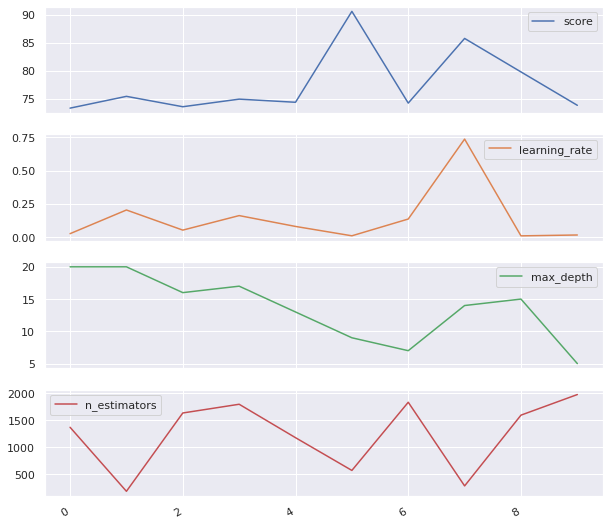

In [ ]:
tpe_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['learning_rate'][0],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

tpe_results_df=pd.DataFrame(tpe_results,
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
tpe_results_df.plot(subplots=True,figsize=(10, 10))

In [ ]:
%%time

# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'learning_rate': hp.loguniform('learning_rate', -5, 0)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=anneal.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=50, # maximum number of iterations
          trials=trials, # logging
          rstate=np.random.RandomState(seed) # fixing random state for the reproducibility
         )

# computing the score on the test set
model = LGBMRegressor(random_state=seed,
                      n_estimators=int(best['n_estimators']),
                      max_depth=int(best['max_depth']),
                      learning_rate=best['learning_rate'])

model.fit(X_train,y_train)

sa_test_score=mean_squared_error(y_test, model.predict(X_test))

print("Best MSE {:.3f} params {}".format( gb_mse_cv(best), best))
print("Best RMSE {:.3f} params {}".format(np.sqrt(gb_mse_cv(best)), best))

100%|██████████| 50/50 [21:25<00:00, 25.71s/it, best loss: 71.51866191489988]
Best MSE 71.519 params {'learning_rate': 0.1829378528278495, 'max_depth': 10.0, 'n_estimators': 221.0}
Best RMSE 8.457 params {'learning_rate': 0.1829378528278495, 'max_depth': 10.0, 'n_estimators': 221.0}
CPU times: user 17.2 s, sys: 2.18 s, total: 19.4 s
Wall time: 21min 50s


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaf3c39400>,
      dtype=object)

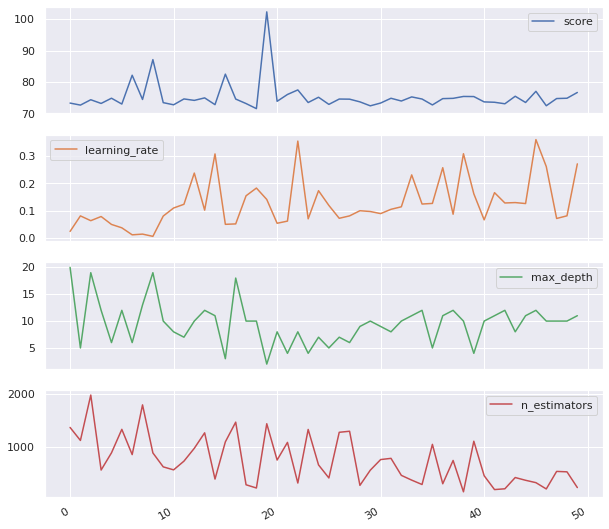

In [ ]:
sa_results=np.array([[x['result']['loss'],
                      x['misc']['vals']['learning_rate'][0],
                      x['misc']['vals']['max_depth'][0],
                      x['misc']['vals']['n_estimators'][0]] for x in trials.trials])

sa_results_df=pd.DataFrame(sa_results,
                           columns=['score', 'learning_rate', 'max_depth', 'n_estimators'])
sa_results_df.plot(subplots=True,figsize=(10, 10))

####Method2


In [ ]:
from xgboost import XGBRegressor
from hyperopt import fmin, tpe, hp, STATUS_OK, STATUS_FAIL, Trials, space_eval, anneal

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

def score(params):
    model = XGBRegressor(**params)
    model.fit(X_train, y_train,
              eval_set=[(X_train, y_train),(X_test, y_test)],
              verbose=False, early_stopping_rounds=10)
    Y_pred = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, Y_pred))
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize(trials):
    space = {
        'max_depth':hp.choice('max_depth', np.arange(3, 35, 2, dtype=int)),
        'min_child_weight':hp.choice('min_child_weight', np.arange(1, 20, 2, dtype=int)),
        'gamma':hp.quniform('gamma', 0.0, 1.0, 0.1),
        'n_estimators':hp.choice('n_estimators', np.arange(1000, 10000, 10, dtype=int)),
        'colsample_bytree':hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'subsample':hp.quniform('subsample', 0.7, 0.9, 0.1),
        'eta':hp.quniform('eta', 0.1, 0.3, 0.1),
        #'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        #'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        #'learning_rate': hp.choice('learning_rate',np.arange(0.05, 0.1, 0.05)),
        'objective':'reg:squarederror',
        'tree_method':'gpu_hist',
        'eval_metric': 'rmse'}
    
    best = fmin(score, space, algo=anneal.suggest, max_evals=50)
    return best

In [ ]:
trials = Trials()
best_params = optimize(trials)

5.72657850639618
5.753260762378734
5.889628803506822
5.786935122280439
5.529717085699587
5.646401571250567
5.753254589532772
5.646399295187383
5.646401571250567
5.677326301413907
5.644760203453597
5.646399295187383
5.680556838881146
5.529717085699587
5.72657850639618
 30%|███       | 15/50 [04:25<08:59, 15.41s/it, best loss: 5.529717085699587]

In [ ]:
# Return the best parameters
space = {
        'max_depth':hp.choice('max_depth', np.arange(3, 35, 2, dtype=int)),
        'min_child_weight':hp.choice('min_child_weight', np.arange(1, 20, 2, dtype=int)),
        'gamma':hp.quniform('gamma', 0.0, 1.0, 0.1),
        'n_estimators':hp.choice('n_estimators', np.arange(5000, 10000, 10, dtype=int)),
        'colsample_bytree':hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'subsample':hp.quniform('subsample', 0.7, 0.9, 0.1),
        'eta':hp.quniform('eta', 0.1, 0.3, 0.1),
        #'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
        #'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
        'learning_rate': hp.choice('learning_rate',    np.arange(0.05, 0.31, 0.05),
        'objective':'reg:squarederror',
        'tree_method':'gpu_hist',
        'eval_metric': 'rmse'}
space_eval(space, best_params)

In [ ]:
# Fit the model with the best parameters
model = XGBRegressor(
    max_depth=14,
    n_estimators=7680,
    colsample_bytree=0.9,
    min_child_weight=280,
    subsample=0.8,    
    eta=0.2,
    objective='reg:squarederror',
    tree_method='gpu_hist')

model.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds=10)

In [ ]:
sub['UnitPrice']= model.predict(dft)

In [ ]:
sub.to_csv("sub.csv")

####Method3

In [ ]:
#import required packages
import lightgbm as lgb
import xgboost as xgb
import catboost as cb
import gc
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt.fmin import fmin
from hyperopt.pyll.stochastic import sample
#optional but advised
import warnings
warnings.filterwarnings('ignore')

#GLOBAL HYPEROPT PARAMETERS
NUM_EVALS = 1000 #number of hyperopt evaluation rounds
N_FOLDS = 5 #number of cross-validation folds on data in each evaluation round

#LIGHTGBM PARAMETERS
LGBM_MAX_LEAVES = 2**11 #maximum number of leaves per tree for LightGBM
LGBM_MAX_DEPTH = 25 #maximum tree depth for LightGBM
EVAL_METRIC_LGBM_REG = 'rmse' #LightGBM regression metric. Note that 'rmse' is more commonly used 
EVAL_METRIC_LGBM_CLASS = 'auc'#LightGBM classification metric

#XGBOOST PARAMETERS
XGB_MAX_LEAVES = 2**12 #maximum number of leaves when using histogram splitting
XGB_MAX_DEPTH = 25 #maximum tree depth for XGBoost
EVAL_METRIC_XGB_REG = 'rmse' #XGBoost regression metric
EVAL_METRIC_XGB_CLASS = 'auc' #XGBoost classification metric

#CATBOOST PARAMETERS
CB_MAX_DEPTH = 8 #maximum tree depth in CatBoost
OBJECTIVE_CB_REG = 'RMSE' #CatBoost regression metric
OBJECTIVE_CB_CLASS = 'Logloss' #CatBoost classification metric

#OPTIONAL OUTPUT
BEST_SCORE = 0

def quick_hyperopt(data, labels, package='lgbm', num_evals=NUM_EVALS, diagnostic=False):
    
    #==========
    #LightGBM
    #==========
    
    if package=='lgbm':
        
        print('Running {} rounds of LightGBM parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth',
                         'num_leaves',
                          'max_bin',
                         'min_data_in_leaf',
                         'min_data_in_bin']
        
        def objective(space_params):
            
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
            
            #extract nested conditional parameters
            if space_params['boosting']['boosting'] == 'goss':
                top_rate = space_params['boosting'].get('top_rate')
                other_rate = space_params['boosting'].get('other_rate')
                #0 <= top_rate + other_rate <= 1
                top_rate = max(top_rate, 0)
                top_rate = min(top_rate, 0.5)
                other_rate = max(other_rate, 0)
                other_rate = min(other_rate, 0.5)
                space_params['top_rate'] = top_rate
                space_params['other_rate'] = other_rate
            
            subsample = space_params['boosting'].get('subsample', 1.0)
            space_params['boosting'] = space_params['boosting']['boosting']
            space_params['subsample'] = subsample
            
            #for classification, set stratified=True and metrics=EVAL_METRIC_LGBM_CLASS
            cv_results = lgb.cv(space_params, train, nfold = N_FOLDS, stratified=False,
                                early_stopping_rounds=100, metrics=EVAL_METRIC_LGBM_REG, seed=42)
            
            best_loss = cv_results['rmse-mean'][-1] #'l2-mean' for rmse
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['auc-mean'][-1]
            #if necessary, replace 'auc-mean' with '[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = lgb.Dataset(data, labels)
                
        #integer and string parameters, used with hp.choice()
        boosting_list = [{'boosting': 'gbdt',
                          'subsample': hp.uniform('subsample', 0.5, 1)},
                         {'boosting': 'goss',
                          'subsample': 1.0,
                         'top_rate': hp.uniform('top_rate', 0, 0.5),
                         'other_rate': hp.uniform('other_rate', 0, 0.5)}] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc'] #modify as required for other classification metrics
        objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
        objective_list_class = ['binary', 'cross_entropy']
        #for classification set objective_list = objective_list_class
        objective_list = objective_list_reg

        space ={'boosting' : hp.choice('boosting', boosting_list),
                'num_leaves' : hp.quniform('num_leaves', 2, LGBM_MAX_LEAVES, 1),
                'max_depth': hp.quniform('max_depth', 2, LGBM_MAX_DEPTH, 1),
                'max_bin': hp.quniform('max_bin', 32, 255, 1),
                'min_data_in_leaf': hp.quniform('min_data_in_leaf', 1, 256, 1),
                'min_data_in_bin': hp.quniform('min_data_in_bin', 1, 256, 1),
                'min_gain_to_split' : hp.quniform('min_gain_to_split', 0.1, 5, 0.01),
                'lambda_l1' : hp.uniform('lambda_l1', 0, 5),
                'lambda_l2' : hp.uniform('lambda_l2', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'metric' : hp.choice('metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'feature_fraction' : hp.quniform('feature_fraction', 0.5, 1, 0.01),
                'bagging_fraction' : hp.quniform('bagging_fraction', 0.5, 1, 0.01)
            }
        
        #optional: activate GPU for LightGBM
        #follow compilation steps here:
        #https://www.kaggle.com/vinhnguyen/gpu-acceleration-for-lightgbm/
        #then uncomment lines below:
        #space['device'] = 'gpu'
        #space['gpu_platform_id'] = 0,
        #space['gpu_device_id'] =  0

        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
                
        #fmin() will return the index of values chosen from the lists/arrays in 'space'
        #to obtain actual values, index values are used to subset the original lists/arrays
        best['boosting'] = boosting_list[best['boosting']]['boosting']#nested dict, index twice
        best['metric'] = metric_list[best['metric']]
        best['objective'] = objective_list[best['objective']]
                
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #XGBoost
    #==========
    
    if package=='xgb':
        
        print('Running {} rounds of XGBoost parameter optimisation:'.format(num_evals))
        #clear space
        gc.collect()
        
        integer_params = ['max_depth']
        
        def objective(space_params):
            
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract multiple nested tree_method conditional parameters
            #libera te tutemet ex inferis
            if space_params['tree_method']['tree_method'] == 'hist':
                max_bin = space_params['tree_method'].get('max_bin')
                space_params['max_bin'] = int(max_bin)
                if space_params['tree_method']['grow_policy']['grow_policy']['grow_policy'] == 'depthwise':
                    grow_policy = space_params['tree_method'].get('grow_policy').get('grow_policy').get('grow_policy')
                    space_params['grow_policy'] = grow_policy
                    space_params['tree_method'] = 'hist'
                else:
                    max_leaves = space_params['tree_method']['grow_policy']['grow_policy'].get('max_leaves')
                    space_params['grow_policy'] = 'lossguide'
                    space_params['max_leaves'] = int(max_leaves)
                    space_params['tree_method'] = 'hist'
            else:
                space_params['tree_method'] = space_params['tree_method'].get('tree_method')
                
            #for classification replace EVAL_METRIC_XGB_REG with EVAL_METRIC_XGB_CLASS
            cv_results = xgb.cv(space_params, train, nfold=N_FOLDS, metrics=[EVAL_METRIC_XGB_REG],
                             early_stopping_rounds=100, stratified=False, seed=42)
            
            best_loss = cv_results['test-rmse-mean'].iloc[-1] #or 'test-rmse-mean' if using RMSE  test-mae-mean
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = 1 - cv_results['test-auc-mean'].iloc[-1]
            #if necessary, replace 'test-auc-mean' with 'test-[your-preferred-metric]-mean'
            return{'loss':best_loss, 'status': STATUS_OK }
        
        train = xgb.DMatrix(data, labels)
        
        #integer and string parameters, used with hp.choice()
        boosting_list = ['gbtree', 'gblinear'] #if including 'dart', make sure to set 'n_estimators'
        metric_list = ['MAE', 'RMSE'] 
        #for classification comment out the line above and uncomment the line below
        #metric_list = ['auc']
        #modify as required for other classification metrics classification
        
        tree_method = [{'tree_method' : 'exact'},
               {'tree_method' : 'approx'},
               {'tree_method' : 'hist',
                'max_bin': hp.quniform('max_bin', 2**3, 2**7, 1),
                'grow_policy' : {'grow_policy': {'grow_policy':'depthwise'},
                                'grow_policy' : {'grow_policy':'lossguide',
                                                  'max_leaves': hp.quniform('max_leaves', 32, XGB_MAX_LEAVES, 1)}}}]
        
        #if using GPU, replace 'exact' with 'gpu_exact' and 'hist' with
        #'gpu_hist' in the nested dictionary above
        
        objective_list_reg = ['reg:squarederror', 'reg:gamma', 'reg:tweedie']
        objective_list_class = ['reg:logistic', 'binary:logistic']
        #for classification change line below to 'objective_list = objective_list_class'
        objective_list = objective_list_reg
        
        space ={'boosting' : hp.choice('boosting', boosting_list),
                'tree_method' : hp.choice('tree_method', tree_method),
                'max_depth': hp.quniform('max_depth', 2, XGB_MAX_DEPTH, 1),
                'reg_alpha' : hp.uniform('reg_alpha', 0, 5),
                'reg_lambda' : hp.uniform('reg_lambda', 0, 5),
                'min_child_weight' : hp.uniform('min_child_weight', 0, 5),
                'gamma' : hp.uniform('gamma', 0, 5),
                'learning_rate' : hp.loguniform('learning_rate', np.log(0.005), np.log(0.2)),
                'eval_metric' : hp.choice('eval_metric', metric_list),
                'objective' : hp.choice('objective', objective_list),
                'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.01),
                'colsample_bynode' : hp.quniform('colsample_bynode', 0.1, 1, 0.01),
                'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),
                'subsample' : hp.quniform('subsample', 0.5, 1, 0.05),
                'nthread' : -1
            }
        
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        best['tree_method'] = tree_method[best['tree_method']]['tree_method']
        best['boosting'] = boosting_list[best['boosting']]
        best['eval_metric'] = metric_list[best['eval_metric']]
        best['objective'] = objective_list[best['objective']]
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        if 'max_bin' in best:
            best['max_bin'] = int(best['max_bin'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    #==========
    #CatBoost
    #==========
    
    if package=='cb':
        
        print('Running {} rounds of CatBoost parameter optimisation:'.format(num_evals))
        
        #clear memory 
        gc.collect()
            
        integer_params = ['depth',
                          #'one_hot_max_size', #for categorical data
                          'min_data_in_leaf',
                          'max_bin']
        
        def objective(space_params):
                        
            #cast integer params from float to int
            for param in integer_params:
                space_params[param] = int(space_params[param])
                
            #extract nested conditional parameters
            if space_params['bootstrap_type']['bootstrap_type'] == 'Bayesian':
                bagging_temp = space_params['bootstrap_type'].get('bagging_temperature')
                space_params['bagging_temperature'] = bagging_temp
                
            if space_params['grow_policy']['grow_policy'] == 'LossGuide':
                max_leaves = space_params['grow_policy'].get('max_leaves')
                space_params['max_leaves'] = int(max_leaves)
                
            space_params['bootstrap_type'] = space_params['bootstrap_type']['bootstrap_type']
            space_params['grow_policy'] = space_params['grow_policy']['grow_policy']
                           
            #random_strength cannot be < 0
            space_params['random_strength'] = max(space_params['random_strength'], 0)
            #fold_len_multiplier cannot be < 1
            space_params['fold_len_multiplier'] = max(space_params['fold_len_multiplier'], 1)
                       
            #for classification set stratified=True
            cv_results = cb.cv(train, space_params, fold_count=N_FOLDS, 
                             early_stopping_rounds=25, stratified=False, partition_random_seed=42)
           
            best_loss = cv_results['test-RMSE-mean'].iloc[-1] #'test-RMSE-mean' for RMSE  test-MAE-mean
            #for classification, comment out the line above and uncomment the line below:
            #best_loss = cv_results['test-Logloss-mean'].iloc[-1]
            #if necessary, replace 'test-Logloss-mean' with 'test-[your-preferred-metric]-mean'
            
            return{'loss':best_loss, 'status': STATUS_OK}
        
        train = cb.Pool(data, labels.astype('float32'))
        
        #integer and string parameters, used with hp.choice()
        bootstrap_type = [{'bootstrap_type':'Poisson'}, 
                           {'bootstrap_type':'Bayesian',
                            'bagging_temperature' : hp.loguniform('bagging_temperature', np.log(1), np.log(50))},
                          {'bootstrap_type':'Bernoulli'}] 
        LEB = ['No', 'AnyImprovement', 'Armijo'] #remove 'Armijo' if using CPU
        #score_function = ['Correlation', 'L2', 'NewtonCorrelation', 'NewtonL2']
        grow_policy = [{'grow_policy':'SymmetricTree'},
                       {'grow_policy':'Depthwise'},
                       {'grow_policy':'Lossguide',
                        'max_leaves': hp.quniform('max_leaves', 2, 32, 1)}]
        eval_metric_list_reg = ['MAE', 'RMSE', 'Poisson']
        eval_metric_list_class = ['Logloss', 'AUC', 'F1']
        #for classification change line below to 'eval_metric_list = eval_metric_list_class'
        eval_metric_list = eval_metric_list_reg
                
        space ={'depth': hp.quniform('depth', 2, CB_MAX_DEPTH, 1),
                'max_bin' : hp.quniform('max_bin', 1, 32, 1), #if using CPU just set this to 254
                'l2_leaf_reg' : hp.uniform('l2_leaf_reg', 0, 5),
                'min_data_in_leaf' : hp.quniform('min_data_in_leaf', 1, 50, 1),
                'random_strength' : hp.loguniform('random_strength', np.log(0.005), np.log(5)),
                #'one_hot_max_size' : hp.quniform('one_hot_max_size', 2, 16, 1), #uncomment if using categorical features
                'bootstrap_type' : hp.choice('bootstrap_type', bootstrap_type),
                'learning_rate' : hp.uniform('learning_rate', 0.05, 0.25),
                'eval_metric' : hp.choice('eval_metric', eval_metric_list),
                'objective' : OBJECTIVE_CB_REG,
                #'score_function' : hp.choice('score_function', score_function), #crashes kernel - reason unknown
                'leaf_estimation_backtracking' : hp.choice('leaf_estimation_backtracking', LEB),
                'grow_policy': hp.choice('grow_policy', grow_policy),
                #'colsample_bylevel' : hp.quniform('colsample_bylevel', 0.1, 1, 0.01),# CPU only
                'fold_len_multiplier' : hp.loguniform('fold_len_multiplier', np.log(1.01), np.log(2.5)),
                'od_type' : 'Iter',
                'od_wait' : 25,
                'task_type' : 'GPU',
                'verbose' : 0
            }
        
        #optional: run CatBoost without GPU
        #uncomment line below
        #space['task_type'] = 'CPU'
            
        trials = Trials()
        best = fmin(fn=objective,
                    space=space,
                    algo=tpe.suggest,
                    max_evals=num_evals, 
                    trials=trials)
        
        #unpack nested dicts first
        best['bootstrap_type'] = bootstrap_type[best['bootstrap_type']]['bootstrap_type']
        best['grow_policy'] = grow_policy[best['grow_policy']]['grow_policy']
        best['eval_metric'] = eval_metric_list[best['eval_metric']]
        
        #best['score_function'] = score_function[best['score_function']] 
        #best['leaf_estimation_method'] = LEM[best['leaf_estimation_method']] #CPU only
        best['leaf_estimation_backtracking'] = LEB[best['leaf_estimation_backtracking']]        
        
        #cast floats of integer params to int
        for param in integer_params:
            best[param] = int(best[param])
        if 'max_leaves' in best:
            best['max_leaves'] = int(best['max_leaves'])
        
        print('{' + '\n'.join('{}: {}'.format(k, v) for k, v in best.items()) + '}')
        
        if diagnostic:
            return(best, trials)
        else:
            return(best)
    
    else:
        print('Package not recognised. Please use "lgbm" for LightGBM, "xgb" for XGBoost or "cb" for CatBoost.')  

In [ ]:
lgbm_params = quick_hyperopt(X, y, 'lgbm', 250)

Running 250 rounds of LightGBM parameter optimisation:
100%|██████████| 250/250 [1:51:43<00:00, 26.82s/it, best loss: 7.606654023475103]
{bagging_fraction: 0.52
boosting: goss
feature_fraction: 0.67
lambda_l1: 2.259185552701689
lambda_l2: 4.659946586141686
learning_rate: 0.163350020544425
max_bin: 193
max_depth: 12
metric: RMSE
min_data_in_bin: 177
min_data_in_leaf: 18
min_gain_to_split: 0.17
num_leaves: 1721
objective: tweedie
other_rate: 0.015502594110794297
top_rate: 0.21109955582776985}


In [ ]:
lgbm_params

{'bagging_fraction': 0.68,
 'boosting': 'goss',
 'feature_fraction': 0.71,
 'lambda_l1': 3.5049097711613992,
 'lambda_l2': 4.074254767512645,
 'learning_rate': 0.19978390375783459,
 'max_bin': 136,
 'max_depth': 18,
 'metric': 'MAE',
 'min_data_in_bin': 33,
 'min_data_in_leaf': 28,
 'min_gain_to_split': 4.48,
 'num_leaves': 233,
 'objective': 'tweedie',
 'other_rate': 0.4935951247533246,
 'top_rate': 0.005405110294770532}

In [ ]:
import lightgbm as lgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
lgb_reg = lgb.LGBMRegressor(bagging_fraction= 0.52,
  boosting= 'goss',
  feature_fraction= 0.67,
  lambda_l1= 2.259185552701689,
  lambda_l2= 4.659946586141686,
  learning_rate= 0.163350020544425,
  max_bin= 193,
  max_depth= 12,
  metric= 'RMSE',
  min_data_in_bin= 177,
  min_data_in_leaf= 18,
  min_gain_to_split= 0.17,
  num_leaves= 1721,
  objective= 'tweedie',
  other_rate= 0.015502594110794297,
  top_rate= 0.21109955582776985)
lgb_reg.fit(X,y)
preds = lgb_reg.predict(dft)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
sub['UnitPrice'] = preds
sub.to_csv("sub1.csv",index=False)

In [ ]:
xgb_params = quick_hyperopt(X, y, 'xgb', 200)

Running 200 rounds of XGBoost parameter optimisation:
100%|██████████| 200/200 [2:30:26<00:00, 45.13s/it, best loss: 7.740244999999999]
{boosting: gblinear
colsample_bylevel: 0.67
colsample_bynode: 0.86
colsample_bytree: 1.0
eval_metric: RMSE
gamma: 2.63156535465054
learning_rate: 0.19516059180816273
max_bin: 18
max_depth: 17
max_leaves: 259
min_child_weight: 4.965457904534935
objective: reg:squarederror
reg_alpha: 4.0278665562848515
reg_lambda: 0.11018537445319598
subsample: 0.8500000000000001
tree_method: hist}


In [ ]:
#np.save('xgb_params.npy', xgb_params)
xgb_params 

{'boosting': 'gblinear',
 'colsample_bylevel': 0.67,
 'colsample_bynode': 0.86,
 'colsample_bytree': 1.0,
 'eval_metric': 'RMSE',
 'gamma': 2.63156535465054,
 'learning_rate': 0.19516059180816273,
 'max_bin': 18,
 'max_depth': 17,
 'max_leaves': 259,
 'min_child_weight': 4.965457904534935,
 'objective': 'reg:squarederror',
 'reg_alpha': 4.0278665562848515,
 'reg_lambda': 0.11018537445319598,
 'subsample': 0.8500000000000001,
 'tree_method': 'hist'}

In [ ]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)
xg_reg = xgb.XGBRegressor(boosting =  'gblinear' ,
  colsample_bylevel = 0.67,
  colsample_bynode = 0.86,
  colsample_bytree = 1.0,
  gamma = 2.63156535465054,
  learning_rate = 0.19516059180816273,
  max_bin = 18,
  max_depth = 17,
  max_leaves = 259,
  min_child_weight = 4.965457904534935,
  objective =  'reg:squarederror' ,
  reg_alpha = 4.0278665562848515,
  reg_lambda = 0.11018537445319598,
  subsample = 0.8500000000000001,
  tree_method =  'hist' )
xg_reg.fit(X,y)
preds = xg_reg.predict(dft)
#rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
sub['UnitPrice'] = preds
sub.to_csv("sub1_xgb.csv",index=False)

In [ ]:
cb_params = quick_hyperopt(X, y, 'cb', 10)

In [ ]:
#np.save('cb_params.npy', cb_params)#

###BayesianOptimization

In [ ]:
import xgboost as xgb

In [ ]:
#Train/Test split
X = df.drop(["UnitPrice"], axis=1)
y = df["UnitPrice"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.7, random_state=seed)
#del(df)
dtrain = xgb.DMatrix(X_train, label=y_train)
#del(X_train)
dtest = xgb.DMatrix(X_test)
#del(X_test)

**Training**

Optimizing hyperparameters with bayesian optimization. I've tried to limit the scope of the search as much as possible since the search space grows exponentially when considering aditional hyperparameters.

GPU acceleration with a few pre tuned hyperparameters speeds up the search a lot.

In [ ]:
def xgb_evaluate(learning_rate,n_estimators,max_depth,min_child_weight):#,colsample_bytree,subsample,gamma):
    params = {'learning_rate':learning_rate,
              'n_estimators':int(n_estimators),
              'max_depth': int(max_depth),
              'min_child_weight':int(min_child_weight),
              'colsample_bytree': 0.8,
              'subsample': 0.8,
              'gamma': 0,
              'scale_pos_weight':1,
              'eval_metric': 'rmse',
              'tree_method':'gpu_hist'}
              
    # Used around 1000 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative RMSE
    return -1.0 * cv_result['test-rmse-mean'].iloc[-1]

In [ ]:
xgb_bo = BayesianOptimization(xgb_evaluate, {'learning_rate':(0.05,1),
                                             'n_estimators':(7000,10000),
                                             'max_depth': (10, 15), 
                                             'min_child_weight':(4,10)
                                             })
# Use the expected improvement acquisition function to handle negative numbers
# Optimally needs quite a few more initiation points and number of iterations
xgb_bo.maximize(init_points=50, n_iter=5, acq='ei')

|   iter    |  target   | learni... | max_depth | min_ch... | n_esti... |
-------------------------------------------------------------------------
|  1        | -12.48    |  0.841    |  12.87    |  8.07     |  7.777e+0 |
|  2        | -11.98    |  0.9541   |  13.3     |  4.25     |  7.985e+0 |
|  3        | -11.22    |  0.4122   |  11.19    |  9.595    |  7.664e+0 |
|  4        | -12.01    |  0.9473   |  11.11    |  8.5      |  8.822e+0 |
|  5        | -10.98    |  0.3377   |  11.46    |  6.183    |  8.653e+0 |
|  6        | -11.14    |  0.6481   |  11.66    |  7.911    |  8.218e+0 |
|  7        | -10.92    |  0.3832   |  14.6     |  6.342    |  7.513e+0 |
|  8        | -10.21    |  0.07891  |  13.97    |  4.734    |  8.255e+0 |
|  9        | -12.0     |  0.8799   |  13.95    |  8.109    |  9.359e+0 |
|  10       | -9.951    |  0.1174   |  10.86    |  6.06     |  8.681e+0 |
|  11       | -10.91    |  0.5611   |  13.9     |  6.186    |  8.434e+0 |
|  12       | -11.19    |  0.6895   | 

In [ ]:
#Extracting the best parameters
params = xgb_bo.max['params']
params['max_depth'] = int(params['max_depth'])
params['n_estimators'] = int(params['n_estimators'])
params['min_child_weight'] = int(params['min_child_weight'])
print(params)

{'learning_rate': 0.060847182637422795, 'max_depth': 10, 'min_child_weight': 6, 'n_estimators': 9113}


In [ ]:
# Train a new model with the best parameters from the search
model2 = xgb.train(params, dtrain, num_boost_round=250)

# Predict on testing and training set
y_pred = model2.predict(dtest)
y_train_pred = model2.predict(dtrain)

# Report testing and training RMSE
print("Train RMSE")
print(np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Val RMSE")
print(np.sqrt(mean_squared_error(y_test, y_pred)))

Train RMSE
4.203785114129448
Val RMSE
8.638925986012692


<Figure size 1080x1584 with 0 Axes>

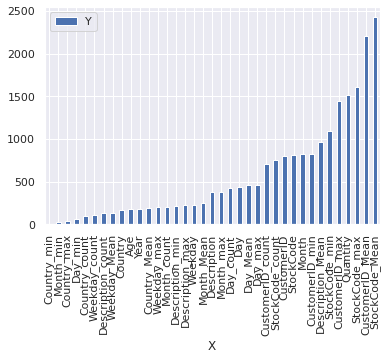

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,22))
fscores = pd.DataFrame({'X': list(model2.get_fscore().keys()), 'Y': list(model2.get_fscore().values())})
fscores.sort_values(by='Y').plot.bar(x='X')

In [ ]:
dtest = xgb.DMatrix(test)
y_pred_test = model2.predict(dtest)
holdout = pd.DataFrame({'key': test.index, 'fare_amount': y_pred_test})
holdout.to_csv('submission.csv', index=False)